# TP 1 - Équation de la chaleur
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et schéma explicite :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} = 0. $$ 

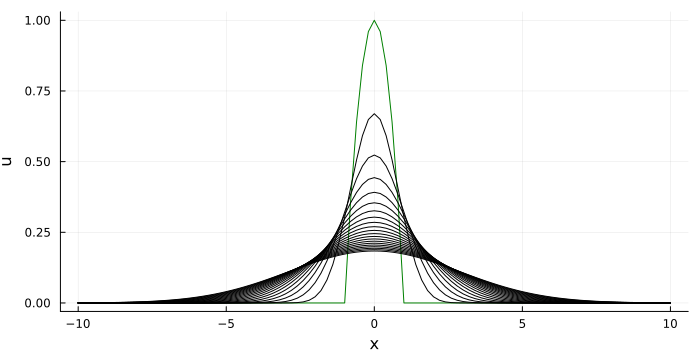

In [130]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
#Δx = 2*L/Nx                            # step size (space)
Δx= 0.2
σ = 0.7                               # CFL
Δt = σ * Δx^2                          # step size (time)
#Δt=0.0000001
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

#B = Tridiagonal(σ*ones(Nx), 1 .- 2*σ*ones(Nx+1), σ*ones(Nx))

#Question 1 et 2 tâche 2
theta = 0.9
gamma = 0.5
A = Tridiagonal(-gamma*(1-theta)*ones(Nx), (1+2(1-theta)*gamma)*ones(Nx+1), -gamma*(1-theta)*ones(Nx))
B = Tridiagonal(theta*gamma*ones(Nx), (1-2*theta*gamma)*ones(Nx+1), theta*gamma*ones(Nx))  

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

Question 1 : 
En augmentant σ, on s'éloigne de la solution optimale.
Finalement, on observe qu'en posant σ=0.51, on obtient un graphique qui explose car le σ ne doit pas dépasser 0.5 pour que le schema soit stable.

En divisant Δx par 2 successivement(Nx=200, Nx=400, Nx=800), on observe que la courbe tend à se confondre avec la courbe calculée à partir de la solution. Cela peut s'expliquer par le fait que Δx correspond au pas et donc en diminuant ce-dernier, l'algorithme sera plus précis.

Question 2 :
Après avoir fait tourner le code pour plusieurs valeurs de Δx pour un Δt petit fixé, on remarque que les différences observées sur le graphe en fonction des variations de Δx sont minimisées (inobservable à l'oeil humain).

Question 3 :
Nous concluons d'après le graphe, que plus le pas Δx diminue, plus l'erreur diminue aussi. Ce qui valide bien nos observation de la question 2.

In [128]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")


for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

LoadError: Increase Nx

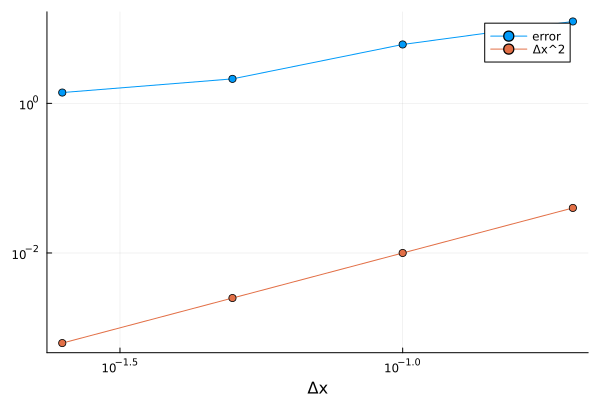

In [129]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025]
errx = [ 12.22245197268432, 5.91462066763392, 2.7607050151088823, 1.1849723569101172]

#cas theta=0.3 et gamma=0.5
errx2 = [ 12.431445292644172,  6.123613987593773, 2.9696983350687347, 1.3939656768699695]

#cas theta=0.5 et gamma=0.5
errx3 = [ 12.431577397773312,  6.123746092722911, 2.9698304401978737, 1.3940977819991085]

#cas theta=0.7 et gamma=0.5
errx4=[ 12.431709045900602, 6.123877740850201, 2.123877740850201, 1.3942294301263984]

plot(Δx, errx4, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

#Question 3 tâche 2
#On observe que pour différentes valeurs de theta, l'erreur dans l'espace diminue lorsque Δx diminue.
#On déduit aussi des études graphiques que lorsque la valeur de theta augmente, l'erreur augmente légèrement.

#Question 4 tâche 2
#On oberse que pour theta<0.5, en faisant varier la valeur de σ, le graphe n'explose jamais donc le schema est inconditionnellement stable.
#On oberse aussi que pour theta=0.5, en faisant varier la valeur de σ, le graphe n'explose jamais donc le schema est inconditionnellement stable.
#Cependant, nous savons d'après le cours que il y a une CFL mais celle-ci est trop précise pour être approximée par approche graphique.
#De plus, lorsqu'on fixe Δx, on observe grâce aux graphes d'erreur que l'ordre en temps n'est plus 1, mais 2.
#Pour finir, on remarque que pour theta>0.5, en faisant varier la valeur de σ, le graphe explose : pour σ>0.5 donc le schema est conditionnellement stable.

#Enfin, on fixe un Δt très petit afin d'étudier l'ordre en espace. Ici, on peut voir que la courbe d'erreur est quasi-parallèle avec la courbe d'erreur
#ce qui montre bien que l'ordre en espace est 2.